In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import escodrinyar as sc
import seaborn.objects as so
import pandas as pd
import numpy as np

In [14]:
# print available themes
import matplotlib.style as style
# style.available

In [15]:
import matplotlib.pyplot as plt

# set to default
plt.style.use('default')

theme = "seaborn-v0_8-colorblind"
so.Plot.config.theme.update(style.library[theme])
plt.style.use(theme)

In [16]:
df = None
for loc in [1, 3, 5]:
    data_i = np.random.normal(loc=loc, scale=1, size=(100, 2))
    df_i = pd.DataFrame(data_i, columns=['x', 'y'])
    df_i['loc'] = str(loc)
    df = pd.concat([df, df_i], ignore_index=True)

In [24]:
points = (
    sc.Plot(data=df, x='x', y='y', color='loc')
    .add(so.Dot(marker='x', alpha=0.2))
)

centroids = (
    sc.Plot(data=df, x='x', y='y', color='loc')
    .add(so.Dot(alpha=1e-8))  # keep axis limits
    .add(so.Dot(), sc.Agg2d())
)
chull = (
    sc.Plot(data=df, x='x', y='y', color='loc')
    .add(sc.ConvexHull(edgewidth=1))
)

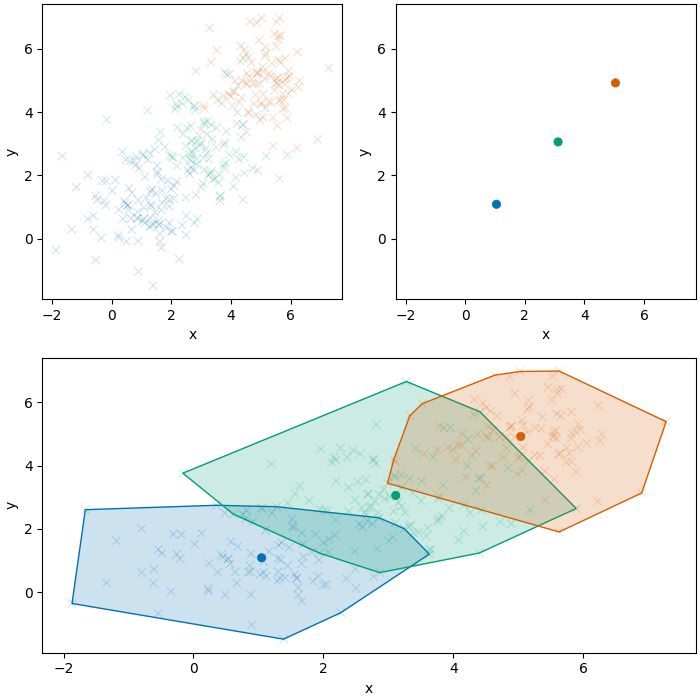

In [25]:
(points + centroids | chull * points * centroids).opts(figsize=(7, 7))